## Model Explainability for Deep Learning Text Classifiers
Dataset - Tweet Emotions 
(Multiclass Classification Problem)

In [7]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("TrainSet.csv")
data.head(5)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [10]:
data.shape

(16000, 2)

In [11]:
data["Emotion"].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [12]:
# We can notice the imbalance in emotions. 
data.isnull().sum()

Text       0
Emotion    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


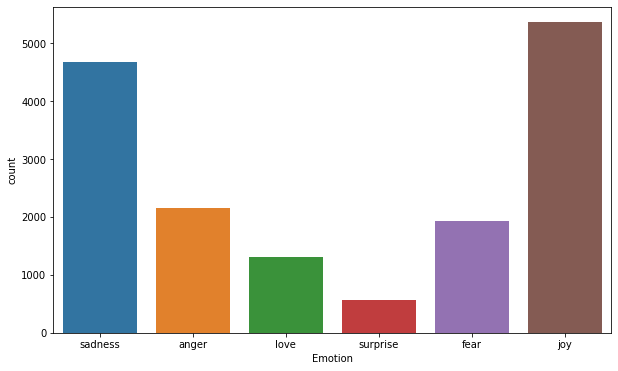

In [13]:
# No null values found in data
# There are no null values
plt.figure(figsize=(10,6))
sns.countplot(data["Emotion"])
plt.show()

In [14]:
# Label Encoding the sentiment column
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#data["Emotion"]= le.fit_transform(data["Emotion"])
#data.head(5)

In [15]:
data["Emotion"].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

## Text Preprocessing:-

- Expanding Contractions
- Removing @mentions, hashtags and emojis 
- Removing Punctuations
- Removing digits
- Converting to lowercase
- Removing Stopwords

In [16]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 5.3 MB/s 
     |████████████████████████████████| 287 kB 41.3 MB/s 


In [17]:
pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import contractions
import preprocessor as p
import string
import regex as re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
STOPWORDS = set(stopwords.words('english'))

# Functions

In [20]:
def expand_contractions(text):
    text = contractions.fix(text)
    return text

def clean_tweet(text):
    text = p.clean(text)
    return text

punct_list=list(string.punctuation)
print(punct_list)
def remove_punctuation(text):
    
    for punc in punct_list:
        
        if punc in text:
            text = text.replace(punc,'')
    return text.strip()

def remove_digits(text):
    text = re.sub(r'\d+', '', text)
    return text

def to_lowercase(text):
    text = text.lower()
    return text

def remove_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text








['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [21]:
data["Text"] = data["Text"].apply(expand_contractions)

In [22]:
data.head(5)

,Text,Emotion
0,i did not feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,i am grabbing a minute to post i feel greedy w...,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [23]:
data["Text"] = data["Text"].apply(clean_tweet)
# Although the dataset appears to be free from hashtags,emojis, punctuations or numbers but this is a safe step to remove these if there are any


In [24]:
data["Text"] = data["Text"].apply(remove_punctuation)

In [25]:
data["Text"] = data["Text"].apply(remove_digits)

In [26]:
data["Text"] = data["Text"].apply(to_lowercase)

In [27]:
data["Text"] = data["Text"].apply(remove_stopwords)

In [28]:
data.head()

,Text,Emotion
0,feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


# Preprocessing is Complete
fit_on_texts Updates internal vocabulary based on a list of texts. 
This method creates the vocabulary index based on word frequency. 
So if you give it something like, "The cat sat on the mat." 
It will create a dictionary s.t. word_index["the"] = 1; word_index["cat"]
= 2 it is word -> index dictionary so every word gets a unique integer
value. 0 is reserved for padding. 
So lower integer means more frequent word (often the first few are stop words because they appear a lot).
texts_to_sequences Transforms each text in texts to a sequence of 
integers. So it basically takes each word in the text and replaces it 
with its corresponding integer value from the word_index dictionary. Nothing more, nothing less, certainly no magic involved.

In [29]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
# The maximum number of words to be used. (most frequent)
max_num_words = 50000
# Max number of words in each text statement.
max_seq_len = 250
embedding_dim = 100
tokenizer = Tokenizer(num_words=max_num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 14985 unique tokens.


In [31]:
X = tokenizer.texts_to_sequences(data['Text'].values)
X = pad_sequences(X, maxlen=max_seq_len)
print('Shape of features:', X.shape)

Shape of features: (16000, 250)


In [32]:
X

array([[   0,    0,    0, ...,    0,    1,  546],
       [   0,    0,    0, ...,   51, 1323, 1100],
       [   0,    0,    0, ...,    1,  370,  317],
       ...,
       [   0,    0,    0, ...,  213,   29, 1175],
       [   0,    0,    0, ...,  439, 1081,  224],
       [   0,    0,    0, ...,    1,  171, 3396]], dtype=int32)

In [33]:
Y = pd.get_dummies(data['Emotion']).values
print('Shape of class labels', Y.shape)

Shape of class labels (16000, 6)


In [34]:
Y

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

In [35]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense 

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(12800, 250) (12800, 6)
(3200, 250) (3200, 6)


In [37]:
X.shape[1]

250

In [38]:
lstm_model = Sequential()
lstm_model.add(Embedding(max_num_words, embedding_dim, input_length=X.shape[1]))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(6, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
epochs = 10
batch_size = 64

history = lstm_model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)


Epoch 1/10
180/180 [==============================] - 141s 751ms/step - loss: 1.4384 - accuracy: 0.4451 - val_loss: 0.9472 - val_accuracy: 0.6664
Epoch 2/10
180/180 [==============================] - 126s 700ms/step - loss: 0.4829 - accuracy: 0.8453 - val_loss: 0.3886 - val_accuracy: 0.8656
Epoch 3/10
180/180 [==============================] - 124s 688ms/step - loss: 0.1659 - accuracy: 0.9473 - val_loss: 0.3167 - val_accuracy: 0.8984
Epoch 4/10
180/180 [==============================] - 125s 697ms/step - loss: 0.0858 - accuracy: 0.9736 - val_loss: 0.3589 - val_accuracy: 0.8891
Epoch 5/10
180/180 [==============================] - 124s 687ms/step - loss: 0.0980 - accuracy: 0.9718 - val_loss: 0.3351 - val_accuracy: 0.9000
Epoch 6/10
180/180 [==============================] - 123s 683ms/step - loss: 0.0468 - accuracy: 0.9862 - val_loss: 0.3412 - val_accuracy: 0.9023
Epoch 7/10
180/180 [==============================] - 125s 694ms/step - loss: 0.0394 - accuracy: 0.9883 - val_loss: 0.3602 -

In [40]:
acc = lstm_model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(acc[0],acc[1]))

100/100 [==============================] - 8s 81ms/step - loss: 0.3965 - accuracy: 0.8972
Test set
  Loss: 0.397
  Accuracy: 0.897


In [41]:
## Using ELI5 for Explaining models

In [42]:
import eli5
from eli5.lime import TextExplainer

In [43]:
def new_predict(texts):
  _seq = tokenizer.texts_to_sequences(texts)
  _text_data = pad_sequences(_seq, maxlen=max_seq_len)
  return lstm_model.predict(_text_data)

In [44]:
example = data["Text"].iloc[1500]
example

'feel law states suggestions optimistic beneficial employees specially wish rapidly ramadan said'

In [49]:
class_names = list(data["Emotion"].unique())
class_names

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']

In [57]:
te = TextExplainer(random_state=2019)
te.fit(example, new_predict)
te.show_prediction(target_names =class_names) # Can we show the visualization for one class at a time? Notsure.

157/157 [==============================] - 16s 101ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
